In [2]:
import pandas as pd

# Загружаем датасеты с сырыми данными

Исходные датасеты должны иметь столбцы MotionNumber, TouchNumer, XCoordinate, YCoordinate, Size, Time, Type и представлять собой csv файл с ; в качестве разделителя.
Датасет можно получить с помощью приложения TouchRecognitor:
https://github.com/AllFi/TouchRecognitor

In [3]:
data_mine_train = pd.read_csv('datasets/User_0_Train.csv', index_col = None, sep=";")
data_mine_test = pd.read_csv('datasets/User_0_Test.csv', index_col = None, sep=";")
data_others_test = []
for i in range(1,21):
    data_others_test.append(pd.read_csv('datasets/User_'+ str(i) + '.csv', index_col = None, sep=";"))

# Создаем новый датафрейм для признаков

In [4]:
data_mine_train

,MotionNumber,TouchNumber,XCoordinate,YCoordinate,Size,Time,Type
0,0,0,444.382812,936.231079,0.153846,372075035,DU
1,0,0,444.382812,936.231079,0.134615,372075066,DU
2,0,0,444.382812,936.231079,0.173077,372075088,DU
3,0,0,433.177887,885.155334,0.115385,372075121,DU
4,0,0,432.561646,829.648804,0.096154,372075138,DU
5,0,0,433.835541,755.783020,0.173077,372075154,DU
6,0,0,443.530548,668.225952,0.192308,372075171,DU
7,0,0,466.919312,587.352234,0.192308,372075188,DU
8,0,0,487.896851,519.239380,0.173077,372075204,DU
9,0,0,507.982849,462.746002,0.134615,372075221,DU


В этом модуле мы непосредственно формируем датасет с признаками. Пока оставим такую же структуру. Чтобы добавить новый признак
необходимо написать функцию типа add_feature_feature_name и вызвать её из функции ниже.

In [5]:
def create_features(data):
    df = pd.DataFrame(index=range(data.iloc[data.shape[0] - 1][0] + 1), columns=['MotionId','Type'])
    for i in range(data.iloc[data.shape[0] - 1][0]):
        try:
            dat = data[(data.MotionNumber == i )]
            df.set_value(i,1, dat.get_value(0,6,takeable=True), takeable=True)
            df.set_value(i,0, i, takeable=True)
        except:
            continue

    df = add_features_vec(df, data)
    df = add_feature_time(df,data)
    df = add_feature_distance(df,data)
    df = add_feature_avrg_speed(df,data)
    df = add_feature_avrg_size(df,data)
    df = add_feature_start_coordinates(df,data)
    df = add_feature_end_coordinates(df,data)
    df = df.fillna(method='pad')
    return df

In [6]:
def add_feature_start_coordinates(df_features, data):
    df_features.insert(df_features.shape[1],'XStart', None)
    df_features.insert(df_features.shape[1],'YStart', None)
    for i in range(df_features.shape[0]):
        sum_size = 0 
        dataMN = data[(data.MotionNumber == i )]
        XStart = dataMN[["XCoordinate"]].get_value(0,0, takeable=True)
        YStart = dataMN[["YCoordinate"]].get_value(0,0, takeable=True)
        df_features.set_value(i, df_features.shape[1] - 2, XStart, takeable=True)
        df_features.set_value(i, df_features.shape[1] - 1, YStart, takeable=True)
    return df_features

In [7]:
def add_feature_end_coordinates(df_features, data):
    df_features.insert(df_features.shape[1],'XEnd', None)
    df_features.insert(df_features.shape[1],'YEnd', None)
    for i in range(df_features.shape[0]):
        sum_size = 0 
        dataMN = data[(data.MotionNumber == i )]
        XStart = dataMN[["XCoordinate"]].get_value(dataMN.shape[0]-1,0, takeable=True)
        YStart = dataMN[["YCoordinate"]].get_value(dataMN.shape[0]-1,0, takeable=True)
        df_features.set_value(i, df_features.shape[1] - 2, XStart, takeable=True)
        df_features.set_value(i, df_features.shape[1] - 1, YStart, takeable=True)
    return df_features

In [8]:
def add_feature_avrg_size(df_features, data):
    df_features.insert(df_features.shape[1],'AvrgSize', None)
    for i in range(df_features.shape[0]):
        sum_size = 0 
        dataMN = data[(data.MotionNumber == i )]
        for j in range(dataMN.shape[0]):
            try:
                sum_size += dataMN[["Size"]].get_value(j,0, takeable=True)
            except:
                continue
        try:
            avrg_size = sum_size / dataMN.shape[0]
            
        except:
            avrg_size = None
        df_features.set_value(i,df_features.shape[1] - 1,avrg_size, takeable=True)
    df_features = df_features.fillna(method="pad")
    return df_features

In [9]:
def add_feature_avrg_speed(df_features, data):
    df_features.insert(df_features.shape[1],'AvrgSpeed', None)
    for i in range(df_features.shape[0]):
        try:
            avrg_speed = df_features[["Distance"]].get_value(i,0, takeable=True) / df_features[["Duration"]].get_value(i,0, takeable=True) 
        except:
            continue
        df_features.set_value(i,df_features.shape[1] - 1,avrg_speed, takeable=True)
    df_features = df_features.fillna(method="pad")
    return df_features

In [10]:
def add_feature_distance(df_features, data):
    df_features.insert(df_features.shape[1],'Distance', None)
    for i in range(data.iloc[data.shape[0] - 1][0]):
        dataMN = data[(data.MotionNumber == i )]
        dat = dataMN[(dataMN.TouchNumber == 0) ]
        dat2 = dataMN[(dataMN.TouchNumber == 1)]
        distance1 = 0
        distance2 = 0
        for j in range(dat.shape[0]-1):
            try:
                x_disp = dat[["XCoordinate"]].get_value(j+1,0, takeable=True) - dat[["XCoordinate"]].get_value(j,0, takeable=True)
                y_disp = dat[["YCoordinate"]].get_value(j+1,0, takeable=True) - dat[["YCoordinate"]].get_value(j,0, takeable=True)
                distance1 += (x_disp**2 + y_disp**2)**(1/2)
            except:
                continue
            if dat2.shape[0] != 0:
                try:
                    x_disp = dat2[["XCoordinate"]].get_value(j+1,0, takeable=True) - dat2[["XCoordinate"]].get_value(j,0, takeable=True)
                    y_disp = dat2[["YCoordinate"]].get_value(j+1,0, takeable=True) - dat2[["YCoordinate"]].get_value(j,0, takeable=True)
                    distance2 += (x_disp**2 + y_disp**2)**(1/2)
                except:
                    continue
            distance = distance1 + distance2
            df_features.set_value(i,df_features.shape[1] - 1,distance, takeable=True)
    df_features = df_features.fillna(method="pad")
    return df_features

In [11]:
def add_feature_time(df_features, data):
    df_features.insert(df_features.shape[1],'Duration', None)
    for i in range(data.iloc[data.shape[0] - 1][0]):
        dataMN = data[(data.MotionNumber == i )]
        time = dataMN.Time.max() - dataMN.Time.min()
        df_features.set_value(i,df_features.shape[1] - 1,time, takeable=True)
    df_features = df_features.fillna(method="pad")
    return df_features

In [12]:
def add_features_vec(df_features, data):
    df_features.insert(df_features.shape[1],'XVec', None)
    df_features.insert(df_features.shape[1],'YVec', None)
    df_features.insert(df_features.shape[1],'VecModule', None)
    
    for i in range(data.iloc[data.shape[0] - 1][0]):
        #print(data[(data.MotionNumber == i )][(data.Time == data.Time.max())]
        dataMN = data[(data.MotionNumber == i )]
        dat = dataMN[(dataMN.TouchNumber == 0) ]
        dat2 = dataMN[(dataMN.TouchNumber == 1)]
        try:
            XVec = dat[dat.Time==dat.Time.max()][["XCoordinate"]].get_value(0,0, takeable=True) - dat[dat.Time==dat.Time.min()][["XCoordinate"]].get_value(0,0, takeable=True)
            YVec = dat[dat.Time==dat.Time.max()][["YCoordinate"]].get_value(0,0, takeable=True) - dat[dat.Time==dat.Time.min()][["YCoordinate"]].get_value(0,0, takeable=True)
        except:
            continue
        if dat2.shape[0] != 0:
            XVec2 = dat2[dat2.Time==dat2.Time.max()][["XCoordinate"]].get_value(0,0, takeable=True) - dat2[dat2.Time==dat2.Time.min()][["XCoordinate"]].get_value(0,0, takeable=True)
            YVec2 = dat2[dat2.Time==dat2.Time.max()][["YCoordinate"]].get_value(0,0, takeable=True) - dat2[dat2.Time==dat2.Time.min()][["YCoordinate"]].get_value(0,0, takeable=True)
            if dat2.YCoordinate.max() > dat.YCoordinate.max(): 
                XVec = XVec2 - XVec
                YVec = YVec2 - YVec
            else:
                XVec = XVec - XVec2
                YVec = YVec - YVec2
                
        df_features.set_value(i,df_features.shape[1] - 3,XVec, takeable=True)
        df_features.set_value(i,df_features.shape[1] - 2,YVec, takeable=True)
        df_features.set_value(i,df_features.shape[1] - 1,(XVec**2 + YVec**2)**(1/2), takeable=True)
    df_features = df_features.fillna(method="pad")
    return df_features

# Функция отображения объектов на плоскости по двум признакам

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_2d(df, feature_x, feature_y):
    X = df[[feature_x, feature_y, "Type"]]

    X = X.fillna(0)
    #print(X)
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', "green", "black", "yellow", "pink"]
    plt.figure(figsize=(16,16))
    plt.scatter(x=X[[feature_x]], y=X[[feature_y]], facecolors='none', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')

    i = 0;
    for t in ["DU", "UD", "LR", "RL", "ZI", "TP", "ZO", "TC", "TCC"]:
        plt.scatter(x=X[X.Type == t][[feature_x]], y=X[X.Type == t][[feature_y]], facecolors=colors[i], edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
        i += 1;
    plt.show()

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_compare_2d(df1, df2, feature1 ,feature2, ttype):
    X1 = df1[[feature1, feature2, "Type"]]
    X1 = X1.fillna(0)
    
    X2 = df2[[feature1, feature2, "Type"]]
    X2 = X2.fillna(0)
    
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', "green", "black", "yellow", "pink"]
    plt.figure(figsize=(16,16))
    plt.scatter(x=X1[X1.Type == ttype][[feature1]], y=X1[X1.Type == ttype][[feature2]], facecolors='red', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
    
    plt.scatter(x=X2[X2.Type == ttype][[feature1]], y=X2[X2.Type == ttype][[feature2]], facecolors='blue', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title("Feature Type:" + ttype)
    plt.show()

In [15]:
def plot_compare_2dd(df1, df2, df3, feature1 ,feature2, ttype):
    X1 = df1[[feature1, feature2, "Type"]]
    X1 = X1.fillna(0)
    
    X2 = df2[[feature1, feature2, "Type"]]
    X2 = X2.fillna(0)
    
    X3 = df3[[feature1, feature2, "Type"]]
    X3 = X3.fillna(0)
    
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', "green", "black", "yellow", "pink"]
    plt.figure(figsize=(12,8))
    plt.scatter(x=X1[X1.Type == ttype][[feature1]], y=X1[X1.Type == ttype][[feature2]], facecolors='red', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
    
    plt.scatter(x=X2[X2.Type == ttype][[feature1]], y=X2[X2.Type == ttype][[feature2]], facecolors='blue', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
    
    plt.scatter(x=X3[X3.Type == ttype][[feature1]], y=X3[X3.Type == ttype][[feature2]], facecolors='green', edgecolors='black',
                       alpha=1.0, linewidth=1, marker='o',
                       s=55, label='test_set')
    plt.xlabel("Координата X вектора")
    plt.ylabel("Координата Y вектора")
    plt.title("Feature Type:" + ttype)
    plt.show()

# Функция отображения объектов в пространстве по трем признакам


In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def plot_3d(df, feature_x, feature_y, feature_z):
    X = df[[feature_x, feature_y, feature_z, "Type"]]

    X = X.fillna(0)
    #print(X)
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', "green", "black", "yellow", "pink"]
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0;
    for t in ["DU", "UD", "LR", "RL", "ZI", "TP", "ZO", "TC", "TCC"]:
        ax.scatter(xs=X[X.Type == t][[feature_x]], ys=X[X.Type == t][[feature_y]], zs=X[X.Type == t][[feature_z]],  c=colors[i], s=55)
        i += 1;
    plt.show()

# Функция для получения датасета для одного конкретного типа движений

In [18]:
def extract_data(data, target):
    return data[data.Type==target]


In [21]:
def combine_data(df_list):
    df = df_list[0].copy()
    for i in range(1,len(df_list)):
        df = df.append(df_list[i],ignore_index=True)
    return df
        

# Поиск аномалий

In [22]:
X_train = extract_data(create_features(data_mine_train), "DU")
X_inline = extract_data(create_features(data_mine_test), "DU")

In [23]:
X_others = [create_features(data) for data in data_others_test]
X_outline = combine_data(X_others)

In [24]:
X_outline.head(1)

,MotionId,Type,XVec,YVec,VecModule,Duration,Distance,AvrgSpeed,AvrgSize,XStart,YStart,XEnd,YEnd
0,0,DU,148.833282,-399.805481,426.609621,309,431.146544,1.395296,0.232794,425.409149,812.327881,574.242432,412.5224


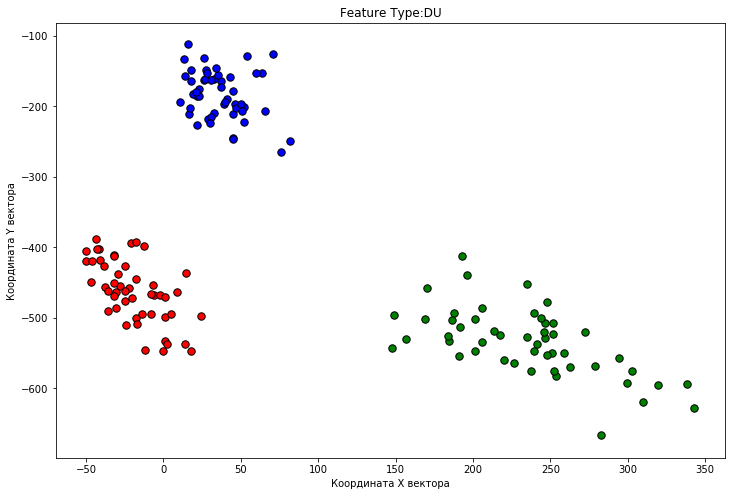

In [25]:
plot_compare_2dd(X_inline[20:70], X_outline[300:350], X_outline[1730:1780], "XVec", "YVec","DU")

In [26]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [27]:
isolation_forest = IsolationForest(random_state=3634, n_estimators=150, n_jobs=-1, contamination=0.067, bootstrap=True)
X_tr = X_train.iloc[:,range(2,13)]
isolation_forest.fit(X_tr.as_matrix())

X_tst = X_outline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    if isolation_forest.predict(outlier) == -1:
        outliers_count+=1
print("FAR=", 100 - (outliers_count * 100) /len(X_tst), "%")

X_tst = X_inline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    if isolation_forest.predict(outlier) == -1:
        outliers_count+=1
print("FRR=", (outliers_count * 100) /len(X_tst), "%")

KeyboardInterrupt: 

In [30]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1477, kernel="rbf", gamma=0.000000001, random_state=343)
X_tr = X_train.iloc[:,range(2,13)]
clf.fit(X_tr)

X_tst = X_outline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    #print(clf.predict(outlier))
    if clf.predict(outlier) == -1:
        outliers_count+=1
print("FAR=", 100 - (outliers_count * 100) /len(X_tst), "%")

X_tst = X_inline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    #print(clf.predict(outlier))
    if clf.predict(outlier) == -1:
        outliers_count+=1
print("FRR=", (outliers_count * 100) /len(X_tst), "%")

FAR= 9.0 %
FRR= 8.95 %


In [40]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1477, kernel="rbf", gamma=0.000000001, random_state=343)
X_tr = X_train.iloc[:,range(2,13)]
clf.fit(X_tr)

X_tst = X_outline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    #print(clf.predict(outlier))
    if clf.predict(outlier) == -1:
        outliers_count+=1
print("FAR=", 100 - (outliers_count * 100) /len(X_tst), "%")

X_tst = X_inline.iloc[:,range(2,13)]
outliers_count = 0
for outlier in X_tst.as_matrix():
    outlier = outlier.reshape(1, -1)
    #print(clf.predict(outlier))
    if clf.predict(outlier) == -1:
        outliers_count+=1
print("FRR=", (outliers_count * 100) /len(X_tst), "%")

FAR= 9.0 %
FRR= 8.95 %
